In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from 0 to 10 in steps of 0.5
x = np.arange(0, 10, 0.5)

In [3]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [4]:
# create y - note numpy's elements - wise operations
# y = m * x + c
y = 5.0 * x +2.0

In [5]:
y

array([ 2. ,  4.5,  7. ,  9.5, 12. , 14.5, 17. , 19.5, 22. , 24.5, 27. ,
       29.5, 32. , 34.5, 37. , 39.5, 42. , 44.5, 47. , 49.5])

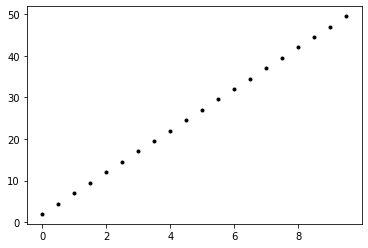

In [6]:
# Plot x versus y.
plt.plot(x, y, 'k.')

In [7]:
# Do regression on the x and y arrays using numpy.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
# doing a regression for us
np.polyfit(x, y, 1)

array([5., 2.])

In [8]:
np.polyfit(x[0:2], y[0:2], 1)

array([5., 2.])

Epsilon => error
***

$$ y = m x + c + \epsilon $$

In [9]:
y = 5.0 * x +2.0 +np.random.normal(0.0, 1.0, len(x))

In [10]:
y

array([ 3.68846124,  6.35420633,  7.46741129, 10.76138928, 10.47869948,
       14.83542108, 16.14275474, 18.56022695, 21.50097468, 25.78451237,
       26.43146905, 28.98252998, 32.74737325, 34.48665877, 37.88989195,
       37.59835383, 41.14244816, 46.55097458, 46.74748851, 49.64556159])

In [11]:
m, c = np.polyfit(x, y, 1)

m, c

(4.916269227861235, 2.537561523355529)

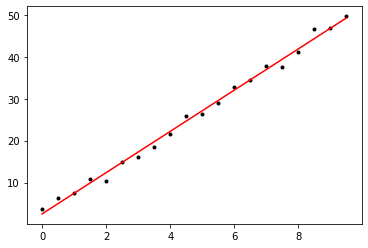

In [12]:
# Plot x versus y.
plt.plot(x, y, 'k.')
plt.plot(x, m *x + c, 'r-')

In [13]:
np.polyfit(x, y, 1)

array([4.91626923, 2.53756152])

We can calculate the best m and c ourselves

In [14]:
#calculate mean x and mean y 
x_avg = np.mean(x)
y_avg = np.mean(y)

# subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

m = np.sum(x_zero * y_zero)/ np.sum(x_zero * x_zero)
#subtract m times average x from average y
c = y_avg - m * x_avg

#Let's have a look - same values as above
m, c


(4.916269227861235, 2.537561523355521)

In [15]:
y = 2.0 * x * x +5.0 +1.0 +np.random.normal(0.0, 1.0, len(x))

In [16]:
y

array([  5.29455857,   4.64818746,   8.01597412,  10.67018486,
        14.20055505,  17.85349504,  26.27959675,  30.86266458,
        36.59954354,  43.99339627,  55.39881725,  66.17202003,
        79.53737529,  89.06129125, 103.49212282, 118.23686126,
       134.63571215, 149.03227352, 168.11126605, 186.28947941])

In [17]:
# blindly try the regression - we get answers
# create variables with those values
m, c = np.polyfit(x, y, 1)
# have a look at m and c.
m, c

(19.011560092078227, -22.885641674097492)

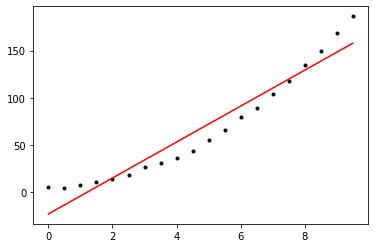

In [18]:
# Plot x versus y.
plt.plot(x, y, 'k.')
plt.plot(x, m *x + c, 'r-')

Note how the points below the line are bunched in a specific x range

### Mult-linear regression

Let's try mulyi-linear regression using sklearn

In [19]:
# import linear_model from sklearn https://scikit-learn.org/stable/
import sklearn.linear_model as lm

In [20]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [21]:
# Let's use pandas to read a csv file and organise our data.
import pandas as pd

In [22]:
# Read the iris csv from online.
df = pd.read_csv('https://datahub.io/machine-learning/iris/r/iris.csv')

petalwidth=t(sepallength)+u(sepalwidth)+v(petallength)+c

In [23]:
# Let's pretend we want to do linear regression on these variables to predict petal width.
x = df[['sepallength', 'sepalwidth', 'petallength']]

In [24]:
# Here's petal width.
y = df['petalwidth']

In [25]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
m.intercept_

-0.248723586024453

In [27]:
m.coef_

array([-0.21027133,  0.22877721,  0.52608818])

In [29]:
# see how good our fit is
m.score(x, y)

0.9380481344518986

In [31]:
# Calculating the score by hand.
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['sepallength'] + u * x['sepalwidth'] + v * x['petallength'] + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

0.9380481344518986

# Using Statmodels

In [32]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:             petalwidth   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           6.20e-88
Time:                        19:28:29   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2487      0.178     -1.396      

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
